In [2]:
import matplotlib.pyplot as plt
from matplotlib import patches, rc, rcParams, lines, patheffects
from matplotlib.animation import FuncAnimation
import numpy as np
from tqdm import tqdm
from IPython.display import display, clear_output, Video
plt.xkcd()

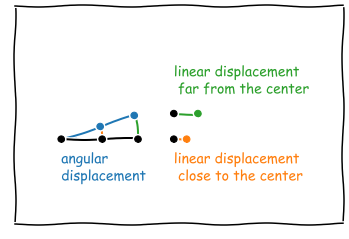

100%|██████████| 60/60 [00:27<00:00,  2.18it/s]


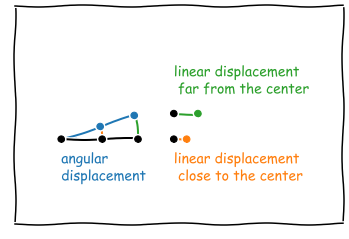

In [25]:
n = 60
def theta(i):
    return np.pi/10+np.exp( - ((i-n//2)/(n/7))**2)

plt.plot([theta(i) for i in range(n)])
display(plt.gcf())
for i in tqdm(range(n)):
    plt.close('all')    
    #plt.plot([0,np.cos(theta(i))*0.8],[0,np.sin(theta(i))*0.8],color='C0',marker='o')
    #plt.gca().add_artist(patches.Arc((0,0),0.4,0.4,theta2=theta(i)*180/np.pi,color='C0',linewidth=10))
    #plt.gca().add_artist(patches.Arc((0,0),1.6,1.6,theta2=theta(i)*180/np.pi,color='C1',linewidth=2))
    #plt.plot([0,0.8],[0,0],'k',marker='o')
    plt.plot([2.2,theta(i)*0.8+2.2],[0.4,0.4],color='C1',marker='o')
    plt.plot([2.2],[0.4],'k',marker='o')
    plt.xlim(-0.9,5.5)
    plt.ylim(-1.25,3)
    
    dy = 0.4
    plt.plot([0,np.cos(theta(i))*1.5],[dy,dy+np.sin(theta(i))*1.5],color='C0',marker='o')
    plt.plot([0,np.cos(theta(i))*0.8],[dy,np.sin(theta(i))*0.8+dy],color='C0',marker='o')
    plt.gca().add_artist(patches.Arc((0,dy),0.4,0.4,theta2=theta(i)*180/np.pi,color='C0',linewidth=10))
    plt.gca().add_artist(patches.Arc((0,dy),3,3,theta2=theta(i)*180/np.pi,color='C2',linewidth=2))
    plt.gca().add_artist(patches.Arc((0,dy),1.6,1.6,theta2=theta(i)*180/np.pi,color='C1',linewidth=2))
    plt.plot([0,1.5],[dy,dy],'k',marker='o')
    plt.plot([0,0.8],[dy,dy],'k',marker='o')
    plt.plot([2.2,theta(i)*1.5+2.2],[0.9,0.9],color='C2',marker='o')
    plt.plot([2.2],[0.9],'k',marker='o')
    
    plt.xticks([])
    plt.yticks([])
    plt.gca().set_aspect('equal')
    plt.text(0,-0.4, "angular\ndisplacement", color='C0')
    plt.text(2.2,1.3, "linear displacement\n far from the center", color='C2')
    plt.text(2.2,-0.4, "linear displacement\n close to the center", color='C1')
    plt.savefig("rotation_%05d.png"%i,dpi=300,bbox_inches='tight')
    
    clear_output(wait=True)
    display(plt.gcf())

In [26]:
!ffmpeg -y -pattern_type glob -framerate 20 -i 'rotation_*.png' -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -preset slow -crf 20 compare_rotations.mp4

ffmpeg version 4.2.2-1ubuntu1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-3ubuntu1)
  configuration: --prefix=/usr --extra-version=1ubuntu1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx

# Images below are unfinished

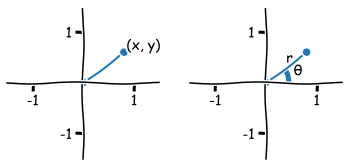

In [14]:
plt.close('all')
    

fig, (ax1, ax2) = plt.subplots(1, 2)

## Make first plot
# set the x-spine (see below for more info on `set_position`)
ax1.set_aspect('equal')
ax1.grid(True, which='both')
ax1.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax1.spines['right'].set_color('none')
ax1.yaxis.tick_left()

# set the y-spine
ax1.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax1.spines['top'].set_color('none')
ax1.xaxis.tick_bottom()
ax1.set_ylim(-1.5,1.5)
ax1.set_xlim(-1.5,1.5)
ax1.plot([0,np.cos(0.64)],[0,np.sin(0.64)],color='C0',marker='o')

#plt.gca().add_artist(patches.Arc((0,0),0.9,0.9,theta2=0.64*180/np.pi,color='C0',linewidth=5))
ax1.set_xticks([-1, 1])
ax1.set_yticks([-1, 1])
ax1.annotate('(x, y)',xy=(0.8, 0.6), xytext=(0.85, 0.65))

## Makesecond plot
# set the x-spine (see below for more info on `set_position`)
ax2.set_aspect('equal')
ax2.grid(True, which='both')
ax2.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax2.spines['right'].set_color('none')
ax2.yaxis.tick_left()

# set the y-spine
ax2.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax2.spines['top'].set_color('none')
ax2.xaxis.tick_bottom()
ax2.set_ylim(-1.5,1.5)
ax2.set_xlim(-1.5,1.5)
ax2.plot([0,np.cos(0.64)],[0,np.sin(0.64)],color='C0',marker='o')

plt.gca().add_artist(patches.Arc((0,0),0.9,0.9,theta2=0.64*180/np.pi,color='C0',linewidth=5))
ax2.set_xticks([-1, 1])
ax2.set_yticks([-1, 1])
ax2.annotate('r',xy=(0.5, 0.4), xytext=(0.4, 0.4))
#ax2.set_xlabel('∑')
ax2.annotate('θ',xy=(0.55, 0.15), xytext=(0.55, 0.15))

plt.savefig("rotation_polarCoordinates.png",dpi=300,bbox_inches='tight')

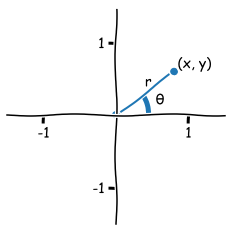

In [13]:
plt.close('all')
    

fig, ax1 = plt.subplots()

## Make first plot
# set the x-spine (see below for more info on `set_position`)
ax1.set_aspect('equal')
ax1.grid(True, which='both')
ax1.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax1.spines['right'].set_color('none')
ax1.yaxis.tick_left()

# set the y-spine
ax1.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax1.spines['top'].set_color('none')
ax1.xaxis.tick_bottom()
ax1.set_ylim(-1.5,1.5)
ax1.set_xlim(-1.5,1.5)
ax1.plot([0,np.cos(0.64)],[0,np.sin(0.64)],color='C0',marker='o')

#plt.gca().add_artist(patches.Arc((0,0),0.9,0.9,theta2=0.64*180/np.pi,color='C0',linewidth=5))
ax1.set_xticks([-1, 1])
ax1.set_yticks([-1, 1])
ax1.annotate('(x, y)',xy=(0.8, 0.6), xytext=(0.85, 0.65))

plt.gca().add_artist(patches.Arc((0,0),0.9,0.9,theta2=0.64*180/np.pi,color='C0',linewidth=5))
ax1.set_xticks([-1, 1])
ax1.set_yticks([-1, 1])
ax1.annotate('r',xy=(0.5, 0.4), xytext=(0.4, 0.4))
#ax2.set_xlabel('∑')
ax1.annotate('θ',xy=(0.55, 0.15), xytext=(0.55, 0.15))

plt.savefig("rotation_polarCart_convert.png",dpi=300,bbox_inches='tight')

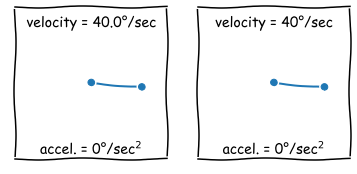

100%|██████████| 72/72 [01:04<00:00,  1.12it/s]


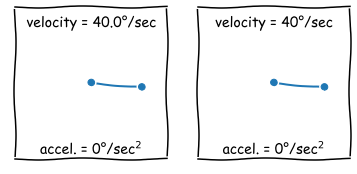

In [108]:
n = 36*2
plt.close('all')
old_velocity = 3;
old_angle = -5/180*np.pi;
frame_rate = 8;

for i in tqdm(range(n)):
    ts = np.arange(i)
    plt.close('all')
    
    angle = i*5/180*np.pi
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot([0,np.cos(angle)],[0,np.sin(angle)],color='C0',marker='o')
    #plt.plot([0,1],[0,0],'k',marker='o')
    ax1.set_ylim(-1.5,1.5)
    ax1.set_xlim(-1.5,1.5)
    ax1.set_aspect('equal')
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    ax1.annotate('velocity = {}°/sec'.format(5.0*frame_rate),xy=(0, 1.1), xytext=(0,1.1),ha='center')
    ax1.annotate('accel. = 0°/sec$^2$',xy=(0, -1.4), xytext=(0,-1.4),ha='center')



    ## Plot accelerating ball
    if i < 31:
        accel = 2
        velocity = old_velocity + accel;
        angle = old_angle + velocity/180*np.pi;
        print(angle-old_angle)
        print(velocity)
        old_velocity = velocity;
        
        old_angle = angle;
    else:
        if velocity > 5:
            accel = -2
        else:
            accel = 0
        velocity = old_velocity + accel;
        angle = old_angle + velocity/180*np.pi;
        print(angle-old_angle)
        print(velocity)
        old_velocity = velocity;
        
        old_angle = angle;
        
    ax2.set_ylim(-1.5,1.5)
    ax2.set_xlim(-1.5,1.5)
    ax2.set_aspect('equal')
    ax2.plot([0,np.cos(angle)],[0,np.sin(angle)],color='C0',marker='o')
    
    ax2.annotate('velocity = {}°/sec'.format(velocity*frame_rate),xy=(0, 1.1), xytext=(0,1.1),ha='center')
    ax2.annotate('accel. = {}°/sec$^2$'.format(accel*frame_rate),xy=(0, -1.4), xytext=(0,-1.4),ha='center')



    plt.xticks([])
    plt.yticks([])
    
    clear_output(wait=True)
    display(plt.gcf())
    plt.savefig("rotation_acceleration_%05d.png"%i,dpi=300,bbox_inches='tight')

In [109]:
!./ffmpeg -y -pattern_type glob -framerate 8 -i 'rotation_acceleration_*.png' -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -preset slow -crf 20  rotation_acceleration.mp4
# Make sure you change the velocity calculation above if you change the frame rate!!!

ffmpeg version N-98460-g6f84e92172-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2020 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-co

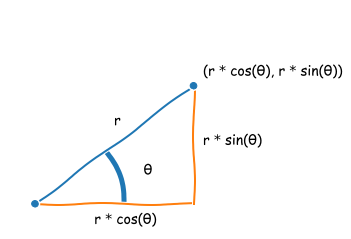

In [25]:
plt.close('all')
    

fig, ax1 = plt.subplots()

## Make first plot
# set the x-spine (see below for more info on `set_position`)
ax1.set_aspect('equal')
ax1.grid(True, which='both')
ax1.spines['left'].set_color('none')

# turn off the right spine/ticks
ax1.spines['right'].set_color('none')

# set the y-spine
ax1.spines['bottom'].set_color('none')

# turn off thetop spine/ticks
ax1.spines['top'].set_color('none')
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

ax1.set_ylim(-.1,1)
ax1.set_xlim(-.1,1)

ax1.plot([0, np.cos(0.64)],[0, 0] ,color='C1',  linewidth=2)
ax1.plot([np.cos(0.64), np.cos(0.64)],[0,np.sin(0.64)] ,color='C1',  linewidth=2)
ax1.plot([0,np.cos(0.64)],[0,np.sin(0.64)],color='C0',marker='o')


l = '\u2217'
#ax1.annotate('%s'%l,xy=(0.4, -0.05), xytext=(0.3, -0.1))
ax1.annotate('r $*$ cos(θ)',xy=(0.4, -0.05), xytext=(0.3, -0.1))
ax1.annotate('r $*$ sin(θ)',xy=(0.8, 0.3), xytext=(0.85, 0.3))
ax1.annotate('(r $*$ cos(θ), r $*$ sin(θ))',xy=(0.8, 0.6), xytext=(0.85, 0.65))


#'%s' % l.decode('unicode-escape')
plt.gca().add_artist(patches.Arc((0,0),0.9,0.9,theta2=0.64*180/np.pi,color='C0',linewidth=5))

ax1.annotate('r',xy=(0.5, 0.4), xytext=(0.4, 0.4))
ax1.annotate('θ',xy=(0.55, 0.15), xytext=(0.55, 0.15))


plt.savefig("rotation_polarCart_trig.png",dpi=300,bbox_inches='tight')

# Animation showing polar coordinates as rotating

100%|██████████| 72/72 [00:48<00:00,  1.50it/s]


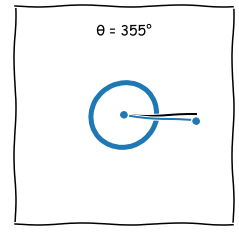

In [81]:
n = 36*2
plt.close('all')
old_velocity = 3;
old_angle = -5/180*np.pi;


for i in tqdm(range(n)):
    ts = np.arange(i)
    plt.close('all')
    
    angle = i*5/180*np.pi
    fig, ax1 = plt.subplots()

    ax1.plot([0,1],[0,0],color='black')


    ax1.plot([0,np.cos(angle)],[0,np.sin(angle)],color='C0',marker='o')
    angle_line = patches.Arc((0,0),0.9,0.9,theta2=i*5,color='C0',linewidth=5)
    ax1.add_artist(angle_line)
    ax1.annotate('θ = {}°'.format(i*5),xy=(0, 1.1), xytext=(0,1.1),ha='center')

    ax1.set_ylim(-1.5,1.5)
    ax1.set_xlim(-1.5,1.5)
    ax1.set_aspect('equal')
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    plt.xticks([])
    plt.yticks([])
    
    clear_output(wait=True)
    #plt.show()
    plt.savefig("rotation_polar_%05d.png"%i,dpi=300,bbox_inches='tight')

##### 

In [83]:
!./ffmpeg -y -pattern_type glob -framerate 5 -i 'rotation_polar_*.png' -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -preset slow -crf 20 polar_animation.mp4

ffmpeg version N-98460-g6f84e92172-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2020 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-co